# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats


In [23]:
sys.path.append('../../../External_Functions')
from ipynb.fs.full.ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ipynb.fs.full.ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

ModuleNotFoundError: No module named 'ipynb'

In [2]:
# Example file location
filename_example = 'data_pendulum_example/Niels1.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

[(0.0, 35.0), (0.0, 99.7044)]

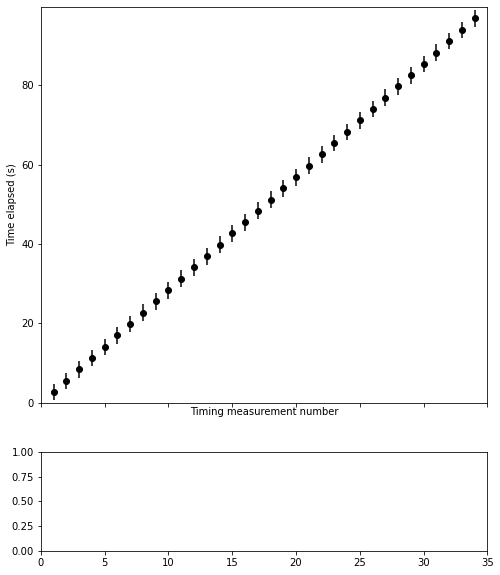

In [4]:
data_example = read_data(filename_example)
n, t = data_example['n'], data_example['t_s']

# Plotting
sig_t = 2.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10),
                       gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
# ax[0].plot(n_plot, t_plot3)
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))


2.854076440030557
-0.20290534759357032


NameError: name 'Chi2Regression' is not defined

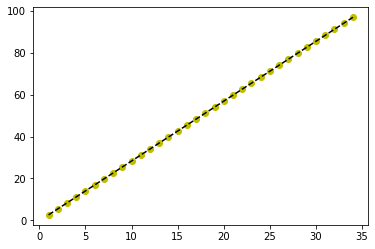

In [14]:
#find a hældning og b skæring af vores fit.
a,b = polyfit(n, t, 1) 
#lav fittet til en funktion
fit = np.poly1d(polyfit(n, t, 1) )

print(a)
print(b)

plt.plot(n,t, 'yo', n, fit(n), '--k')

# Lav et chi kvadrat fit med external.
chi2fit = Chi2Regression(fit, n, t, np.sqrt(len(n)))

minuit_chi2 = Minuit(chi2fit, Nexp=Nbkg, tau=2.7, Ngauss=Npeak, mu=3.1, sigma=0.3)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output

# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.